# Demonstration of `dead_leaves` usage

## Import

In [19]:
from dead_leaves import DeadLeavesImage, DeadLeavesModel

%reload_ext autoreload
%autoreload 2

## Single image generation

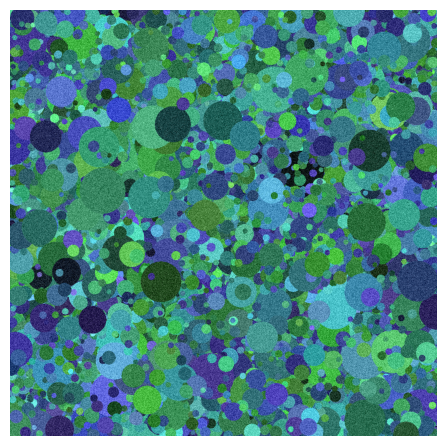

In [28]:
shape_params = {
    'area': {'powerlaw': {'low': 100.0, 'high': 10000.0, 'k': 1.5}}
}

model1 = DeadLeavesModel(
    "circular", 
    shape_params,
    (1000,1000)
    )
leaves, partition = model1.sample_partition()

color_params = {
    'H': {'uniform': {'low': 0.3, 'high': 0.7}},
    'S': {'normal': {'loc': 0.6, 'scale': 0.05}},
    'V': {'normal': {'loc': 0.6, 'scale': 0.15}}
}

texture_params = {
    'gray': {'normal': {'loc': 0, 'scale': 0.1}}
}

colormodel1 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params
    )
image = colormodel1.sample_image()
colormodel1.show(image)

## Mask

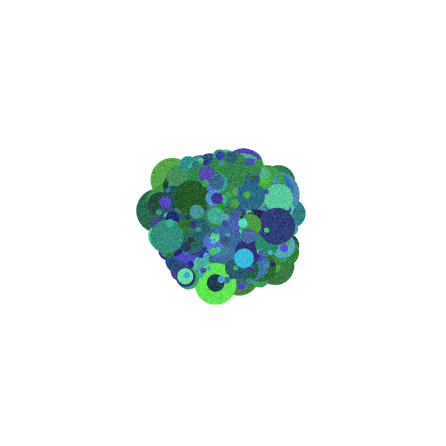

In [ ]:
import torch

position_mask = model1._circular_leaf_mask(
    {
        'x_pos': 500,
        'y_pos': 500, 
        'area': torch.tensor([80000], device = model1.device)
        }
)

model2 = DeadLeavesModel(
    "circular",
    shape_params,
    (1000,1000),
    position_mask
)

leaves, partition = model2.sample_partition()

colormodel2 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params,
    background_color = torch.tensor([1.,1.,1.], device=model2.device)
    )
image = colormodel2.sample_image()
colormodel2.show(image)